<a href="https://colab.research.google.com/github/MFBS2005/gomycode/blob/main/checkpoint4_dsc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
import pandas as pd
import numpy as np
x=pd.read_csv("/content/drive/My Drive/kc_house_data.csv")
x.head()
x.columns

In [2]:
print(x.isnull().sum().sum())
l1=["date","id","yr_renovated"]
for i in l1:
  x.drop([i],axis=1,inplace=True)
x.head()

0


,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
0,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,98178,47.5112,-122.257,1340,5650
1,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,98125,47.7210,-122.319,1690,7639
2,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,98028,47.7379,-122.233,2720,8062
3,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,98136,47.5208,-122.393,1360,5000
4,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,98074,47.6168,-122.045,1800,7503


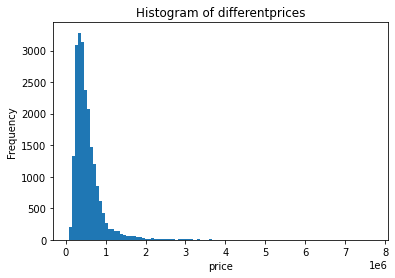

In [3]:
import matplotlib.pyplot as plt
plt.title("Histogram of differentprices")
plt.xlabel("price")
x["price"].plot.hist(bins=100)

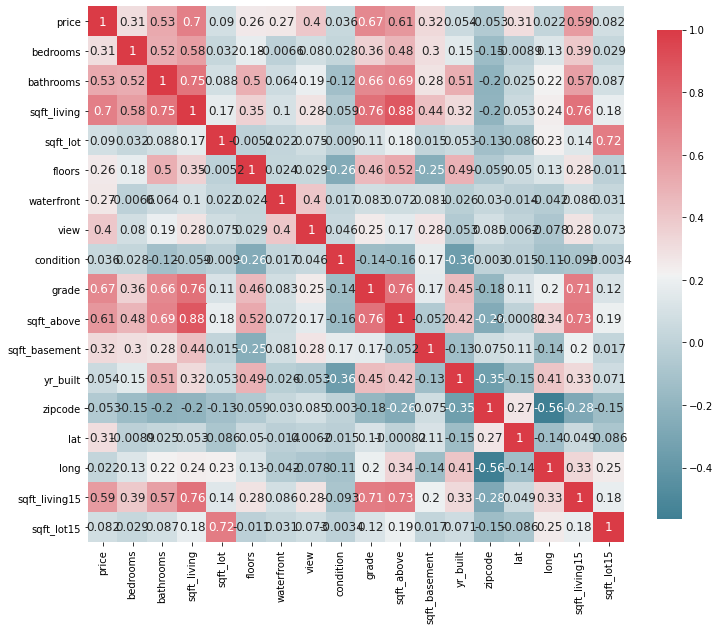

In [4]:
import seaborn as sns
def plot_correlation_map(df):
    corr = df.corr()
    s , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    s = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
        )
plot_correlation_map(x)

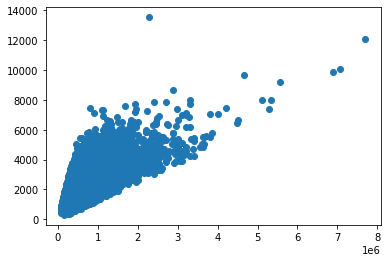

In [5]:
from matplotlib import pyplot
pyplot.scatter(x["price"],x["sqft_living"])
pyplot.show()

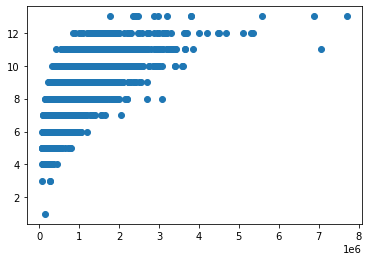

In [6]:
pyplot.scatter(x["price"],x["grade"])
pyplot.show()

In [7]:
#the biggest correlation is between price and "sqft_living" and between price and "grade".
#the less important features are the id and the date,this is why they have been dropped.

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn import metrics
xx=x['grade'].values[:,np.newaxis]
y=x["price"].values
xx_train,xx_test,y_train,y_test=train_test_split(xx,y,test_size=0.2,random_state=40)
model=LinearRegression()   
model.fit(xx_train,y_train) 
predicted=model.predict(xx_test) 

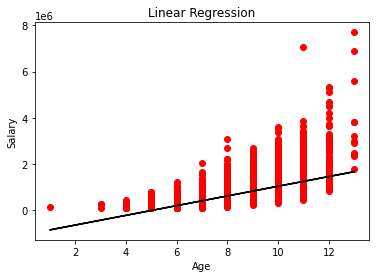

MSE 68533946794.312935
R squared 0.4552042311532961


In [9]:
plt.scatter(xx,y,color="r")
plt.title("Linear Regression")
plt.ylabel("Salary")
plt.xlabel("Age")
plt.plot(xx,model.predict(xx),color="k")
plt.show()
print("MSE", mean_squared_error(y_test,predicted))
print("R squared", metrics.r2_score(y_test,predicted))

In [22]:
xxx=x[["grade","sqft_living","bathrooms","sqft_above","yr_built","sqft_living15"]]
yy=x["price"].values
xxx_train,xxx_test,yy_train,yy_test=train_test_split(xxx,yy,test_size=0.2,random_state=40)
model=LinearRegression() 
model.fit(xxx_train,yy_train)
predicted=model.predict(xxx_test)
print("MSE:", mean_squared_error(y_test,predicted))
print("R squared:", metrics.r2_score(y_test,predicted))
#the scores of the model with multi linear regression is higher than our first model.
#exp:R squraed1(0.4552042311532961)<R squraed2(0.6155894841806462)

MSE: 48357882613.71586
R squared: 0.6155894841806462


In [20]:
from sklearn.preprocessing import PolynomialFeatures 
xxx=x[["grade","sqft_living",'bedrooms','bathrooms',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15']]
yy=x["price"].values
xxx_train,xxx_test,yy_train,yy_test=train_test_split(xxx,yy,test_size=0.2,random_state=40)
rr=LinearRegression()
poly=PolynomialFeatures(degree=3)
xxx_train_fit = poly.fit_transform(xxx_train)
rr.fit(xxx_train_fit, yy_train)
xxx_test_ = poly.fit_transform(xxx_test)
predicted = rr.predict(xxx_test_)
print("MSE: ", metrics.mean_squared_error(yy_test, predicted))
print("R squared: ", metrics.r2_score(yy_test,predicted))

MSE:  26487275254.500122
R squared:  0.7894451412489334


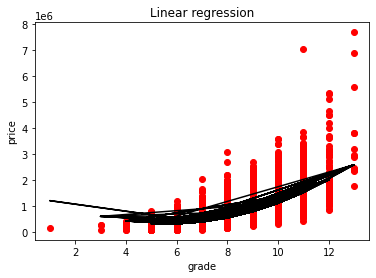

In [12]:
f= x["grade"].values.reshape(-1,1)
y= x["price"].values
poly = PolynomialFeatures(degree = 2) 
f_poly = poly.fit_transform(f) 
poly.fit(f_poly, y) 
lg=LinearRegression()
lg.fit(f_poly, y) 
plt.scatter(f,y,color="r")
plt.title("Linear regression")
plt.ylabel("price")
plt.xlabel("grade")
plt.plot(f,lg.predict(f_poly), color="k") 